# <font color=darkblue>**Universidad Nacional Autónoma de México**
# <font color=darkblue>**Facultad de Ciencias**
# <font color=orange>**Práctica 4 de Análisis Numérico**
# <font color=orange>**Semestre 2023-1**
# Dra. Úrsula Iturrarán Viveros

# Integrantes: 

*   Olvera Trejo Alberto
*   Ramos López Gabriela



## **Integración numérica**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import pandas as pd

# **Ejercicio 1**
La gráfica de la función $f(x)=\sqrt{1-x^2}$, en el intervalo $[-1,1]$, corresponde a la mitad superior de una circunferencia unitaria con centro en el origen. Entonces, se cumple la siguiente relación:

$$ \pi = 2\int_{-1}^{1}\sqrt{1-x^2}dx.$$

Luego, es posible aproximar a $\pi$ mediante la suma

$$ \pi \approx 2 \overset{n-1}{\underset{k=0}{\sum}}\sqrt{1-(x_{k+1})^2}\cdot (x_{k+1}-x_k),$$

donde $n\geq 2 $, $x_k= x_0 + k(2/n)$ para $k = 0,1,2,...,n$, $x_0 = -1$ y $x_n = 1$; en teoría la aproximación mejora para valores de $n$ grandes. Escribe un programa que, al introducir un valor de $n$, aproxime el valor de $\pi$ mediante esta relación.

In [ ]:
def aprox_pi(n):
  x0 = -1
  xn = 1
  k = 0
  raiz = 0

  while k <= n-1:
    xk = x0 + k*(2/n)
    xk1 = x0 + (k+1)*(2/n)

    raiz += math.sqrt(1-(xk1)**2)*(xk1-xk)
    k += 1

  pi = 2*raiz
  return pi

n = int(input('Ingrese un valor para n, n = '))
print("El valor aproximado de pi será: ", aprox_pi(n))

Ingrese un valor para n, n = 10000
El valor aproximado de pi será:  3.1415893274306


Escribe otro programa que calcule la aproximación de $\pi$ mediante la regla del trapecio compuesta, considerando $n$ subintervalos, $f(x) = 2\sqrt{1-x^2}$ y el intervalo $[-1,1]$. Los cálculos se deben hacer en doble precisión.

In [ ]:
def trape_comp(f, a, b, num_intervalos):
  n = num_intervalos
  h = (b-a)/n
  #Creamos la particion homogenea de n subintervalos 
  particion = np.linspace(a, b, n + 1)

  #A cada nodo le aplicamos la funcion f
  evaluacion = f(particion)

  #Multiplicamos cada punto por el peso correspondiente
  evaluacion = h*evaluacion

  evaluacion[0] = (1/2)*evaluacion[0]
  evaluacion[-1] = (1/2)*evaluacion[-1]

  #Sumamos e imprimimos el resultado
  integral = sum(evaluacion)
  return integral


In [ ]:
def f(x):
  return 2*np.sqrt(1-x**2)

integral = trape_comp(f, -1, 1, 10000)
print('El valor de la integral es: \n')
print(integral)

El valor de la integral es: 

3.141589327430582


In [ ]:
#Calculamos cual metodo es mejor
print('Riemann:')
print(f'3.1415893274306 - pi = {abs(3.1415893274306 - math.pi)}\n')

print('Trapecio:')
print(f'3.1415893274306 - pi = {abs(3.141589327430582 - math.pi)}')

#El error mas chico se obtiene con la suma de Riemann

Riemann:
3.1415893274306 - pi = 3.326159192962308e-06

Trapecio:
3.1415893274306 - pi = 3.3261592111699656e-06


> - <font color=blue> ¿Qué método converge más rápido a $\pi$?</font>

El primer método, es decir, las sumas de Riemann
> - <font color=blue> Explica tu respuesta anterior.</font>

El error es más chico con el primer método

# **Ejercicio 2**
Escribe un programa que aproxime el valor de la integral

$$ \int_{-1}^{1} e^{-x^2}dx,$$

primero con la regla de Simpson 1/3, luego con la regla de Simpson 1/3 compuesta que considere $n$ subintervalos, donde $n$ es cualquier entero positivo entre 2 y 1000.

In [ ]:
def f(x):
    return math.e**(-x**2)

def Simpson(x0, xn):
  h = (xn - x0) / 6
  return h*(f(x0) + 4*f((x0+xn)/2)+f(xn))

def SimpsonC(x0,xn,n):
    h = (xn - x0) / n
    I = f(x0) + f(xn)
    
    for i in range(1,n):
        k = x0 + i*h
        
        if i%2 == 0:
            I = I + 2 * f(k)
        else:
            I = I + 4 * f(k)
    
    I = I * h/3
    
    return I

a = -1
b = 1
n = int(input('Ingresa el número de subintervalos, tal que n sea par, n = ')) 

solucion1 = Simpson(a,b) 
solucion2 = SimpsonC(a,b,n)
print('El valor aproximado de la integral de f(x)=e^{-x^2} con la regla de Simpson 1/3 es:', solucion1)
print('El valor aproximado de la integral de f(x)=e^{-x^2}  con la regla de Simpson 1/3 Compuesta es:', solucion2)

Ingresa el número de subintervalos, tal que n sea par, n = 100
El valor aproximado de la integral de f(x)=e^{-x^2} con la regla de Simpson 1/3 es: 1.5785862941142952
El valor aproximado de la integral de f(x)=e^{-x^2}  con la regla de Simpson 1/3 Compuesta es: 1.493648268240636


# **Ejercicio 3**

La función logaritmo se define como

$$\log (x) = \int_1^x \frac{dt}{t}.$$

Escribe un programa que mediante una regla compuesta que puede ser de punto medio, de trapecio o de Simpson, y que considere $n = 10^5$ subintervalos, obtenga el valor de $\log(x)$ para cualquier número $x>0$. 

*Divide el problema en tres casos: $x<1$, $x = 1$ y $x>1$*.

In [ ]:
#Modificamos el codigo creado en el ejercicio 1
def trape_comp_log(x):
  num_intervalos = 10**5
  f = lambda x : 1/x

  if x == 1:
    log = 0
  elif x > 1:
    log = trape_comp(f, 1, x, num_intervalos)
  elif x < 1:
    log = -trape_comp(f, x, 1, num_intervalos)
    
  return log

log = trape_comp_log(np.e)
print(f'*** log({np.e}) = {log}')

*** log(2.718281828459045) = 1.0000000000212443


Haz una rutina que genere una tabla que muestre el valor de $\log(x_j)$ para $x_j = 10^{-4+j}$, con $j = 0,1,2,...,20$; utilizando tu programa anterior. Al mismo tiempo, en la tabla se debe mostrar el valor de $\log(x_j)$ calculado por la función predeterminada de la máquina y el error absoluto al comparar lo calculado por tu programa y lo que calcula la función $\log(x)$ predeterminada.

In [ ]:
dic_tabla = {}

for j in range(21):
  x = 10**(j-4)
  y = trape_comp_log(x)

  dic_tabla[x] = y

x = [str(10**(j-4)) for j in range(21)]
y = [str(trape_comp_log(10**(j-4))) for j in range(21)]
valor_real = [str(np.log(10**(j-4))) for j in range(21)]
error = [str(abs(float(y[i]) - float(valor_real[i]))) for i in range(21)]

dic_tabla = {'x' : x, 'Aprox log(x)' : y,
             'Real log(x)' : valor_real, 'Error' : error}

df = pd.DataFrame(dic_tabla)
df

,x,Aprox log(x),Real log(x),Error
0,0.0001,-9.211172709568073,-9.210340371976182,0.0008323375918912745
1,0.001,-6.907763595565741,-6.907755278982137,8.316583604006667e-06
2,0.01,-4.605170267654927,-4.605170185988091,8.166683596044777e-08
3,0.1,-2.302585093662311,-2.3025850929940455,6.682654429823742e-10
4,1,0,0.0,0.0
5,10,2.302585093662311,2.302585092994046,6.682649988931644e-10
6,100,4.605170267654928,4.605170185988092,8.166683596044777e-08
7,1000,6.907763595565742,6.907755278982137,8.316583604894845e-06
8,10000,9.211172709568073,9.210340371976184,0.0008323375918894982
9,100000,11.5901396805282,11.512925464970229,0.07721421555797114


> - <font color=blue> ¿Qué sucede para valores pequeños de $x$?.</font>

Para valores pequeños de $x$ la aproximación es buena debido a que el error obtenido es muy chico
> - <font color=blue> ¿Qué sucede para valores grandes de $x$?.</font>

Al tomar valores grandes de $x$ vemos que el error empieza a crecer demasiado
> - <font color=blue> Explica tus respuestas.</font>

Si el valor de $x$ es muy grande, entonces la región a integrar crece por lo que la partición homogenea de $n = 10^5$ ya es una partición fina del intervalo $[1, x]$, es decir que los intervalos formados son cadad vez más grandes y por lo tanto los errores crecen

# **Ejercicio 4**

El periodo de un péndulo simple es determinado por una integral elípitca completa de primer tipo

$$K(x) = \int_{0}^{\pi /2} \frac{d\theta}{\sqrt{1 - x^2 \sin^2(\theta)}}.$$

Escribe un programa que mediante una cuadratura compuesta (puede ser de punto medio, trapecio o Simpson) que considere 1000 subintervalos, devuelva el valor de $K(x)$ para algún valor de $x\in \left[ 0, 1 \right)$. Utiliza doble precisión.

En tu programa, implementa una rutina que grafique a $K(x)$ para valores suficientes de $x\in \left[ 0, 1 \right).$

Text(0, 0.5, '$K(x)$')

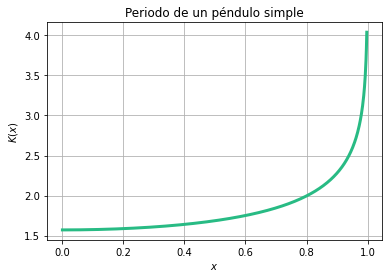

In [ ]:
def K(x):
  #definimos la funcion a integrar
  def integrando(theta):
    a = np.sqrt(1 - (x*np.sin(theta))**2)
    return 1/a

  #mandamos llamar a la funcion de la regla del trapezoide compuesta
  k = trape_comp(integrando, 0, np.pi/2, 1000)
  return k

#creamos los arreglos x, y para graficar

x = np.linspace(0, 1, 801)
#eliminamos x = 1 para quedarnos con el intervalo [0, 1)
x = x[:-2]
y = [K(xj) for xj in x]

plt.plot(x, y, color = '#28BB84', linewidth = 3)
plt.title('Periodo de un péndulo simple')
plt.grid(True)
plt.xlabel(r'$x$')
plt.ylabel(r'$K(x)$')

> - <font color=blue> ¿Cómo es el comportamiento de $x$ cuando se acerca a $1$?.</font>

Si $x \to 1$, entonces la función $K(x) \to \infty$